# Bivariate Data Analysis

In [1]:
# libraries
import os
import sys
import inspect
sys.path.append("../src")

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from shared import directories
from shared import filenames
from shared import variables
sys.path.append(directories.ANALYSIS_PATH)

import bivariate, independence

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## Obtain training data

In [3]:
df = pd.read_csv(os.path.join(directories.INTERIM_DATA_DIR,
                              filenames.TRAIN_FILENAME),
                 encoding="Latin-1", low_memory=False)
df.samerace = df.samerace.astype(object)
df.wave = df.wave.astype(object)
df.wave_size = df.wave_size.astype(float)

## Match Summary 

### Categorical Predictors

In [4]:
independence.assoc_table(df, y='match')

,x,y,Cramer's V,Strength
0,wave,match,0.090245,Very Weak Association
2,race,match,0.043702,Very Weak Association
3,race_o,match,0.043522,Very Weak Association
4,samerace,match,0.006639,Very Weak Association
1,gender,match,0.006013,Very Weak Association


### Quantitative Predictors

In [53]:
independence.aov_table(df, y='match')

,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,match,funny_partner,1717.522308,1.772911e+04,1.0,5126.0,496.585607,4.461933e-105,0.088320
0,match,funny_o,1674.788786,1.797873e+04,1.0,5114.0,476.388964,4.712835e-101,0.085216
0,match,shared_interests_o,1720.669506,2.037935e+04,1.0,4659.0,393.368812,4.141728e-84,0.077858
0,match,shared_interests_partner,1599.364270,1.997353e+04,1.0,4668.0,373.786343,3.552211e-80,0.074138
0,match,attractive_partner,1424.415389,1.834295e+04,1.0,5222.0,405.512636,6.439135e-87,0.072059
0,match,rel_funny,23.127058,3.113805e+02,1.0,5064.0,376.116744,7.025812e-81,0.069138
0,match,attractive_o,1318.665483,1.835833e+04,1.0,5208.0,374.086918,1.521357e-80,0.067016
0,match,rel_funny_o,22.595342,3.535859e+02,1.0,5054.0,322.967830,4.759873e-70,0.060065
0,match,rel_attractive_o,21.539458,5.872558e+02,1.0,5147.0,188.782442,3.234423e-42,0.035380
0,match,intelligence_o,387.991906,1.198695e+04,1.0,5147.0,166.597426,1.557403e-37,0.031353


## Match Analysis Detail

### Match by Age

Matches by Age


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
age,Matched,894.0,12,19.0,24.0,26.200224,26.0,28.0,42.0,-8.515481,70.513423
age,Not Matched,4409.0,46,18.0,24.0,26.434112,26.0,28.0,55.0,-9.688047,91.858259


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,age,match,40.660536,67764.269504,1.0,5301.0,3.180754,0.074568,0.0006


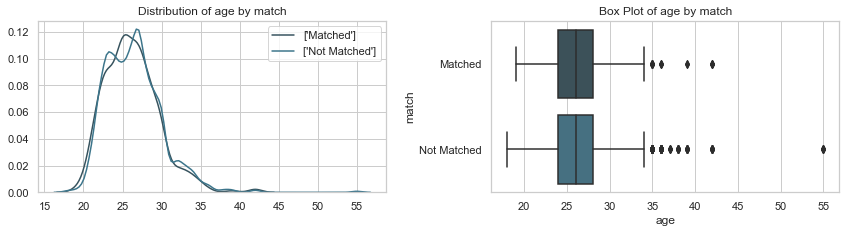

In [6]:
x = 'age'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Matches by Age" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Age Difference

Matches by Difference in Age


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
d_age,Matched,906.0,0,0.0,1.0,3.857616,3.0,5.0,34.0,0.0,-3.0
d_age,Not Matched,4455.0,0,0.0,1.0,4.266891,3.0,5.0,37.0,0.0,-3.0


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,d_age,match,126.113344,115176.298893,1.0,5359.0,5.867886,0.015453,0.001094


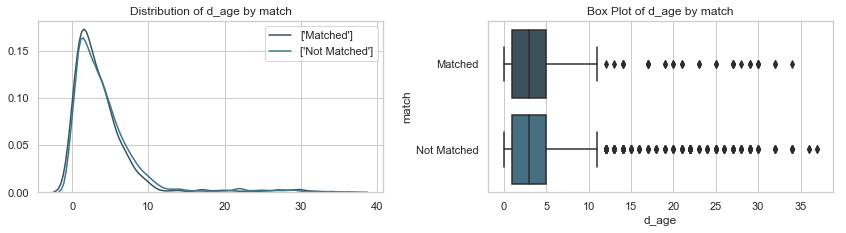

In [7]:
x = 'd_age'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Matches by Difference in Age" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Race

Matches by Race


match,Matched,Not Matched,All
race,,,
asian,167,1093,1260
black,57,206,263
caucasian,524,2509,3033
latino,83,346,429
other,67,272,339
All,898,4426,5324


Anova


,x,y,Cramer's V,Strength
0,race,match,0.040421,Very Weak Association


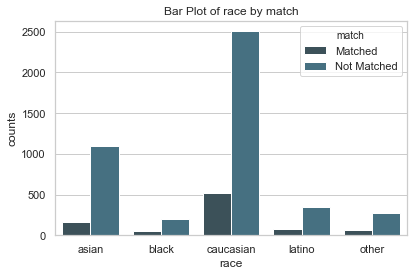

In [8]:
x = 'race'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Matches by Race" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Race of Partner

Matches by Race of Partner


match,Matched,Not Matched,All
race_o,,,
asian,170,1080,1250
black,53,237,290
caucasian,515,2489,3004
latino,82,338,420
other,77,264,341
All,897,4408,5305


Anova


,x,y,Cramer's V,Strength
0,race_o,match,0.044265,Very Weak Association


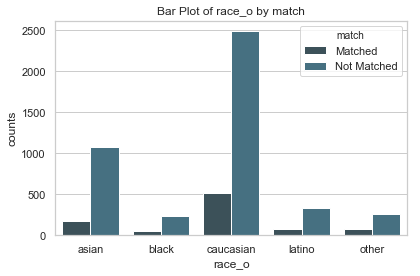

In [9]:
x = 'race_o'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Matches by Race of Partner" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Same Race

Matches by Race of Partner


match,Matched,Not Matched,All
samerace,,,
0,538,2703,3241
1,368,1752,2120
All,906,4455,5361


Anova


,x,y,Cramer's V,Strength
0,samerace,match,0.002948,Very Weak Association


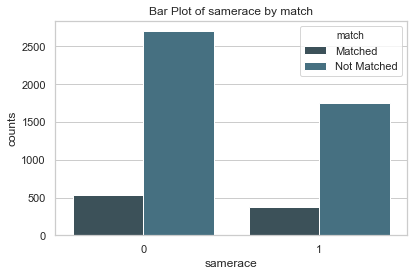

In [10]:
x = 'samerace'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Matches by Race of Partner" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Importance Same Race

Matches by Importance Same Race


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
importance_same_race,Matched,898.0,8,0.0,1.0,3.429844,2.0,5.0,10.0,-10.500424,108.258909
importance_same_race,Not Matched,4413.0,42,0.0,1.0,3.852028,3.0,6.0,10.0,-10.152879,101.080946


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,importance_same_race,match,132.995671,43388.454527,1.0,5309.0,16.273316,0.000056,0.003056


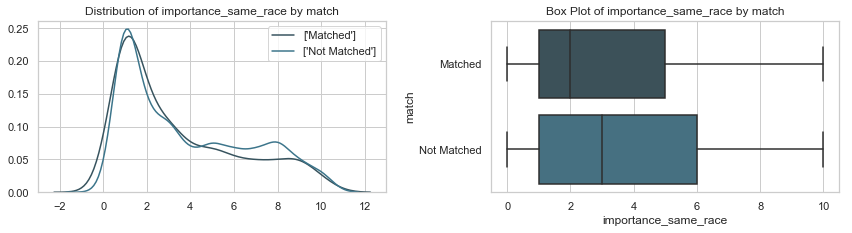

In [11]:
x = 'importance_same_race'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Matches by Importance Same Race" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Partner Preference for Attractive

Match by Partner Preference for Attractive


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
pref_o_attractive,Matched,896.0,10,0.0,15.0,23.155290,20.0,25.0,100.0,-9.360083,85.611161
pref_o_attractive,Not Matched,4401.0,54,0.0,15.0,22.416169,20.0,25.0,100.0,-8.916965,77.512270


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,pref_o_attractive,match,406.687325,850758.703535,1.0,5295.0,2.531164,0.111678,0.000478


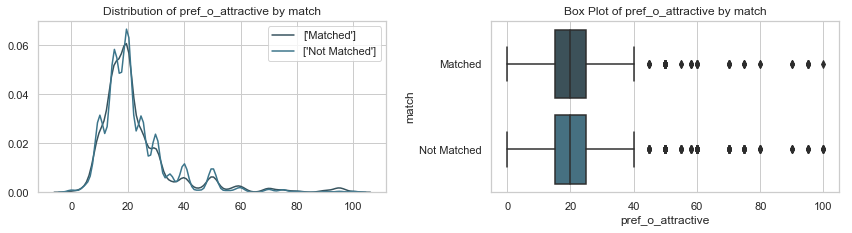

In [12]:
x = 'pref_o_attractive'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Partner Preference for Attractive" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Partner Preference for Sincerity

Match by Partner Preference for Sincerity


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
pref_o_sincere,Matched,896.0,10,0.0,13.8275,16.663605,18.00,20.0,60.0,-9.360083,85.611161
pref_o_sincere,Not Matched,4401.0,54,0.0,15.0000,17.430130,18.87,20.0,60.0,-8.916965,77.512270


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,pref_o_sincere,match,437.402847,253135.888882,1.0,5295.0,9.149426,0.0025,0.001725


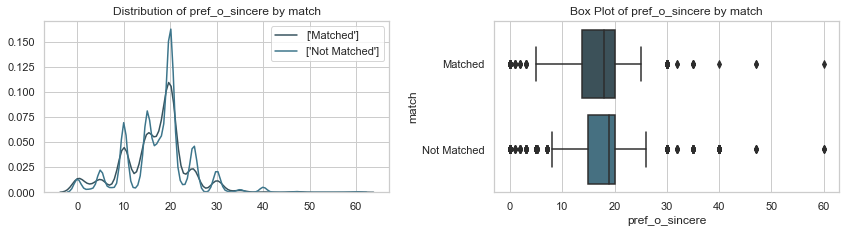

In [13]:
x = 'pref_o_sincere'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Partner Preference for Sincerity" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Partner Preference for Intelligence

Match by Partner Preference for Intelligence


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
pref_o_intelligence,Matched,896.0,10,0.0,18.00,20.366328,20.0,25.00,50.0,-9.360083,85.611161
pref_o_intelligence,Not Matched,4401.0,54,0.0,17.31,20.222495,20.0,23.26,50.0,-8.916965,77.512270


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,pref_o_intelligence,match,15.400964,243385.253226,1.0,5295.0,0.335058,0.562721,0.000063


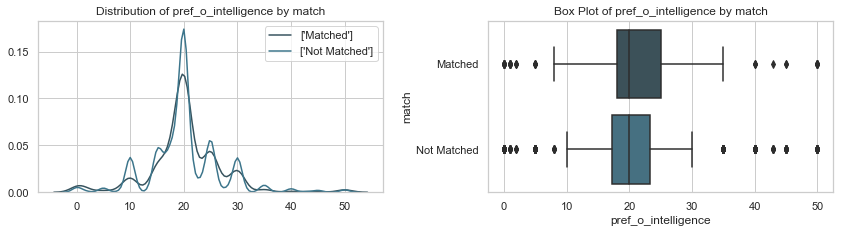

In [14]:
x = 'pref_o_intelligence'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Partner Preference for Intelligence" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Partner Preference for Sense of Humor

Match by Partner Preference for Sense of Humor


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
pref_o_funny,Matched,894.0,12,0.0,15.0,18.075235,19.23,20.0,50.0,-8.515481,70.513423
pref_o_funny,Not Matched,4395.0,60,0.0,15.0,17.318446,18.00,20.0,50.0,-8.441780,69.263652


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,pref_o_funny,match,425.473369,192698.539987,1.0,5287.0,11.673559,0.000639,0.002203


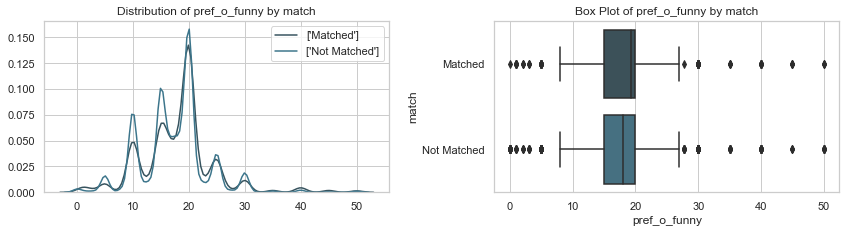

In [15]:
x = 'pref_o_funny'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Partner Preference for Sense of Humor" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Partner Preference for Ambition

Match by Partner Preference for Ambition


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
pref_o_ambitious,Matched,891.0,15,0.0,5.0,10.733502,10.0,15.0,25.0,-7.577390,55.416835
pref_o_ambitious,Not Matched,4390.0,65,0.0,5.0,10.774059,10.0,15.0,53.0,-8.096497,63.553268


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,pref_o_ambitious,match,1.218342,200258.541739,1.0,5279.0,0.032117,0.857779,0.000006


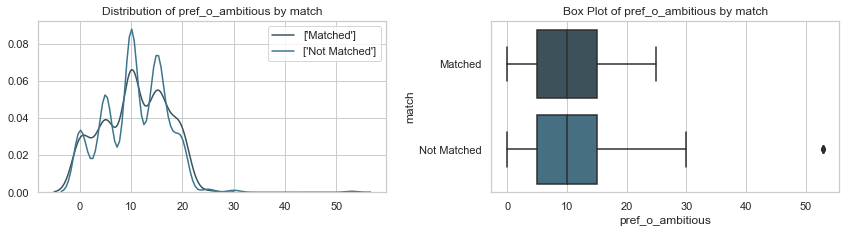

In [16]:
x = 'pref_o_ambitious'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Partner Preference for Ambition" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Partner Preference for Shared Interests

Match by Partner Preference for Shared Interests


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
pref_o_shared_interests,Matched,891.0,15,0.0,5.0,11.135477,10.00,15.0,30.0,-7.577390,55.416835
pref_o_shared_interests,Not Matched,4377.0,78,0.0,10.0,12.056669,11.63,16.0,30.0,-7.357527,52.133205


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,pref_o_shared_interests,match,628.215665,216939.238106,1.0,5266.0,15.249356,0.000095,0.002887


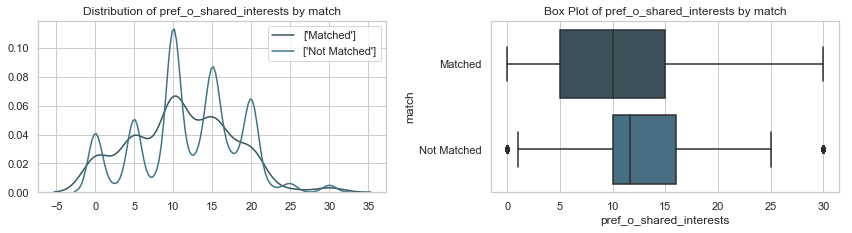

In [17]:
x = 'pref_o_shared_interests'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Partner Preference for Shared Interests" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Partner's Rating of Subject on Attractiveness

Match by Partner's Rating of Subject on Attractiveness


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
attractive_o,Matched,904.0,2,1.0,6.0,7.299226,7.0,8.0,10.5,-21.213256,448.002212
attractive_o,Not Matched,4306.0,149,0.0,5.0,5.970715,6.0,7.0,10.0,-5.189791,24.933932


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,attractive_o,match,1318.665483,18358.326655,1.0,5208.0,374.086918,1.521357e-80,0.067016


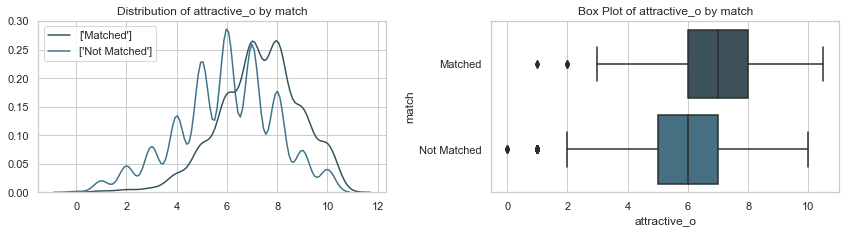

In [18]:
x = 'attractive_o'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Partner's Rating of Subject on Attractiveness" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Partner's Rating of Subject on Sincerity

Match by Partner's Rating of Subject on Sincerity


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
sincere_o,Matched,899.0,7,0.0,7.0,7.822024,8.0,9.0,10.0,-11.244392,124.436358
sincere_o,Not Matched,4264.0,191,0.0,6.0,7.035647,7.0,8.0,10.0,-4.513247,18.369401


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,sincere_o,match,459.130961,15166.605529,1.0,5161.0,156.236337,2.431430e-35,0.029383


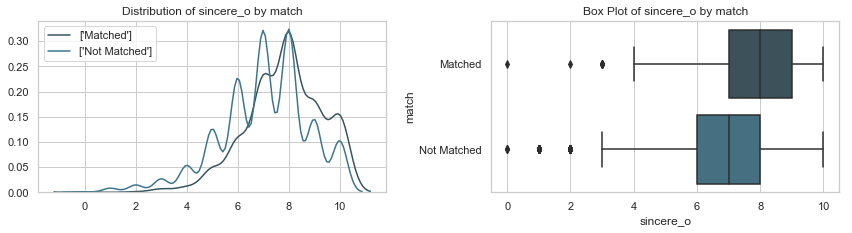

In [19]:
x = 'sincere_o'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Partner's Rating of Subject on Sincerity" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Partner's Rating of Subject on Intelligence

Match by Partner's Rating of Subject on Intelligence


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
intelligence_o,Matched,899.0,7,3.0,7.0,7.966630,8.0,9.0,10.0,-11.244392,124.436358
intelligence_o,Not Matched,4250.0,205,0.0,6.0,7.243529,7.0,8.0,10.0,-4.333583,16.779943


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,intelligence_o,match,387.991906,11986.945946,1.0,5147.0,166.597426,1.557403e-37,0.031353


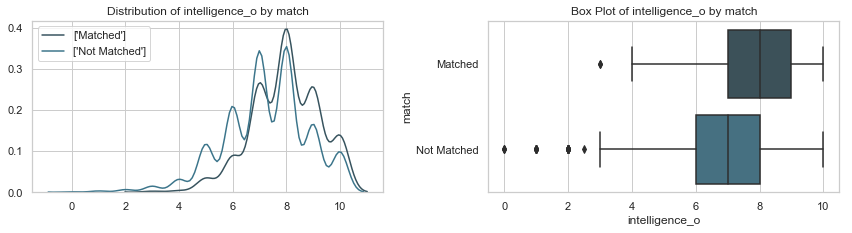

In [20]:
x = 'intelligence_o'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Partner's Rating of Subject on Intelligence" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Partner's Rating of Subject on Sense of Humor

Match by Partner's Rating of Subject on Sense of Humor


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
funny_o,Matched,895.0,11,1.0,7.0,7.658101,8.0,9.0,10.0,-8.909317,77.375927
funny_o,Not Matched,4221.0,234,0.0,5.0,6.152097,6.0,8.0,10.0,-4.011720,14.093899


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,funny_o,match,1674.788786,17978.732716,1.0,5114.0,476.388964,4.712835e-101,0.085216


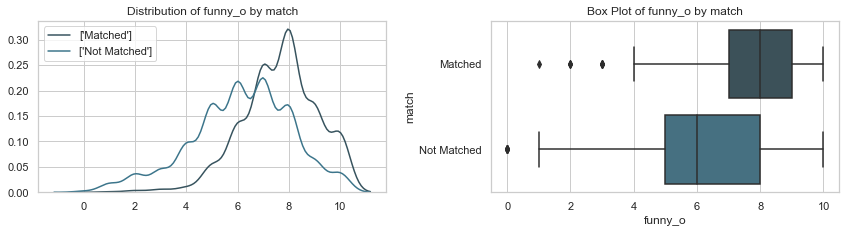

In [21]:
x = 'funny_o'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Partner's Rating of Subject on Sense of Humor" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Partner's Rating of Subject on Ambition

Match by Partner's Rating of Subject on Ambition


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
ambitious_o,Matched,859.0,47,0.0,6.0,7.336438,7.0,8.0,10.0,-4.041202,14.331311
ambitious_o,Not Matched,4039.0,416,0.0,5.0,6.649171,7.0,8.0,10.0,-2.795019,5.812130


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,ambitious_o,match,334.579544,15550.144221,1.0,4896.0,105.343167,1.814883e-24,0.021063


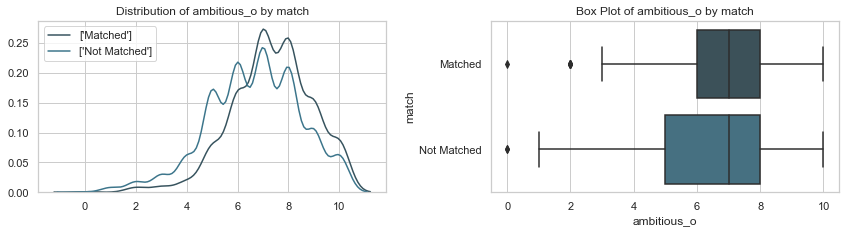

In [22]:
x = 'ambitious_o'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Partner's Rating of Subject on Ambition" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Partner's Rating of Subject on Shared Interests

Match by Partner's Rating of Subject on Shared Interests


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
shared_interests_o,Matched,819.0,87,0.0,6.0,6.803419,7.0,8.0,10.0,-2.742266,5.520020
shared_interests_o,Not Matched,3842.0,613,0.0,4.0,5.206923,5.0,7.0,10.0,-2.104065,2.427089


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,shared_interests_o,match,1720.669506,20379.346263,1.0,4659.0,393.368812,4.141728e-84,0.077858


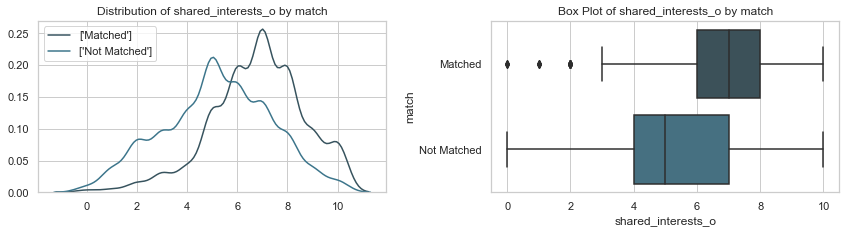

In [23]:
x = 'shared_interests_o'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Partner's Rating of Subject on Shared Interests" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Importance of Attractiveness to Subject

Match by Importance of Attractiveness to Subject


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
attractive_important,Matched,898.0,8,0.0,15.0,22.802283,20.0,25.0,95.0,-10.500424,108.258909
attractive_important,Not Matched,4413.0,42,0.0,15.0,22.494974,20.0,25.0,100.0,-10.152879,101.080946


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,attractive_important,match,70.466754,843049.732342,1.0,5309.0,0.443756,0.505344,0.000084


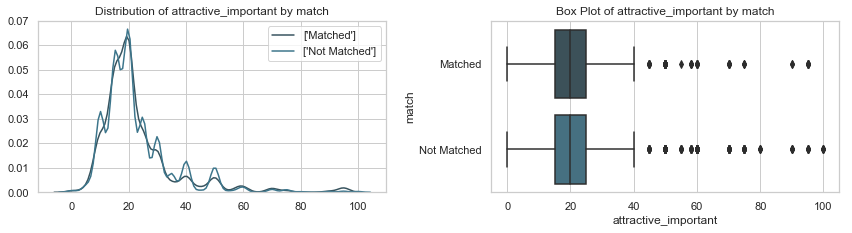

In [24]:
x = 'attractive_important'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Importance of Attractiveness to Subject" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Importance of Sincerity to Subject

Match by Importance of Sincerity to Subject


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
sincere_important,Matched,898.0,8,0.0,14.29,17.015011,18.00,20.0,60.0,-10.500424,108.258909
sincere_important,Not Matched,4413.0,42,0.0,15.00,17.400358,18.37,20.0,60.0,-10.152879,101.080946


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,sincere_important,match,110.799473,260262.985484,1.0,5309.0,2.260154,0.1328,0.000426


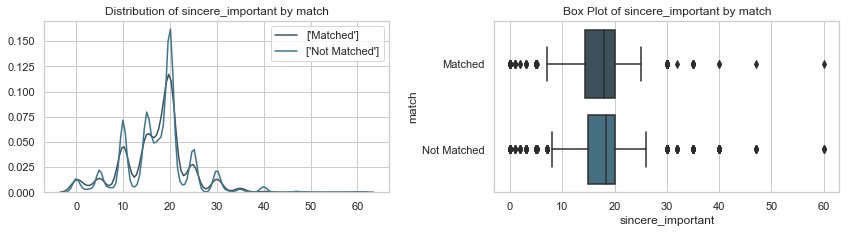

In [25]:
x = 'sincere_important'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Importance of Sincerity to Subject" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Importance of Intelligence to Subject

Match by Importance of Attractiveness to Subject


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
attractive_important,Matched,898.0,8,0.0,15.0,22.802283,20.0,25.0,95.0,-10.500424,108.258909
attractive_important,Not Matched,4413.0,42,0.0,15.0,22.494974,20.0,25.0,100.0,-10.152879,101.080946


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,attractive_important,match,70.466754,843049.732342,1.0,5309.0,0.443756,0.505344,0.000084


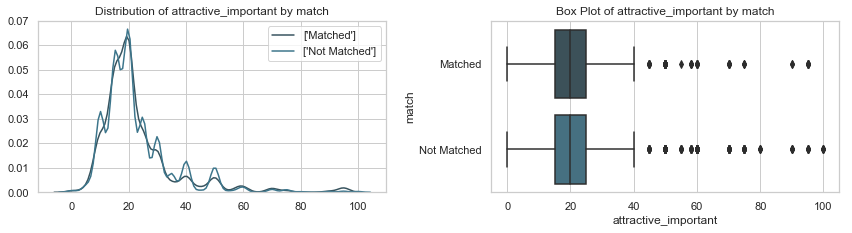

In [26]:
x = 'attractive_important'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Importance of Attractiveness to Subject" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Importance of Sense of Humor to Subject

Match by Importance of Sense of Humor to Subject


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
funny_important,Matched,898.0,8,1.0,15.0,18.134265,19.23,20.0,50.0,-10.500424,108.258909
funny_important,Not Matched,4409.0,46,0.0,15.0,17.422524,18.00,20.0,50.0,-9.688047,91.858259


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,funny_important,match,377.929585,198168.109769,1.0,5305.0,10.117251,0.001477,0.001903


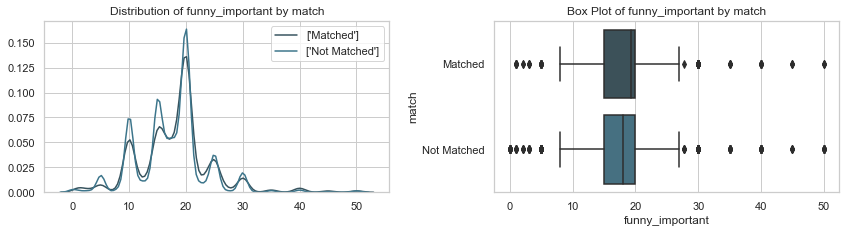

In [27]:
x = 'funny_important'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Importance of Sense of Humor to Subject" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Importance of Ambition to Subject

Match by Importance of Ambition to Subject


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
ambitious_important,Matched,895.0,11,0.0,5.0,10.618536,10.0,15.0,53.0,-8.909317,77.375927
ambitious_important,Not Matched,4405.0,50,0.0,5.0,10.684588,10.0,15.0,53.0,-9.279620,84.111351


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,ambitious_important,match,3.245342,199460.86236,1.0,5298.0,0.086201,0.769074,0.000016


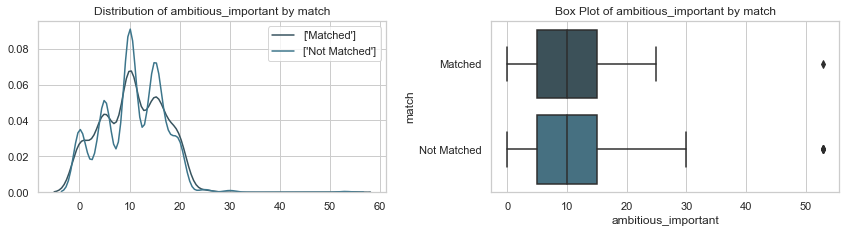

In [28]:
x = 'ambitious_important'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Importance of Ambition to Subject" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Importance of Shared Interests to Subject

Match by Importance of Shared Interests to Subject


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
shared_interests_important,Matched,895.0,11,0.0,5.0,11.054637,10.00,15.0,30.0,-8.909317,77.375927
shared_interests_important,Not Matched,4392.0,63,0.0,10.0,11.936908,11.54,16.0,30.0,-8.229741,65.728630


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,shared_interests_important,match,578.73561,214198.410068,1.0,5285.0,14.279367,0.000159,0.002695


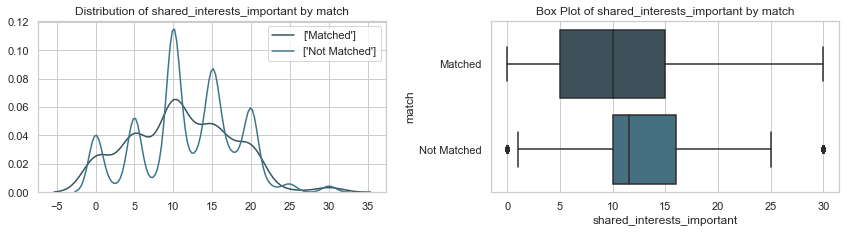

In [29]:
x = 'shared_interests_important'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Importance of Shared Interests to Subject" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Subject's Self Rating on Attractiveness

Match by Subject's Self Rating on Attractiveness


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
attractive,Matched,888.0,18,3.0,7.0,7.209459,7.0,8.0,10.0,-6.881395,45.353604
attractive,Not Matched,4404.0,51,2.0,6.0,7.067666,7.0,8.0,10.0,-9.185016,82.364522


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,attractive,match,14.857793,10260.876145,1.0,5290.0,7.659943,0.005666,0.001446


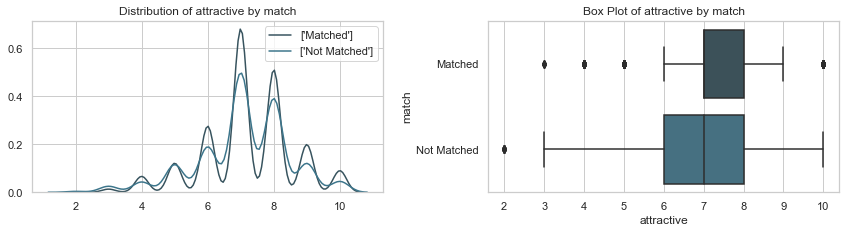

In [30]:
x = 'attractive'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Subject's Self Rating on Attractiveness" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Subject's Self Rating on Sincerity

Match by Subject's Self Rating on Sincerity


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
sincere,Matched,888.0,18,2.0,8.0,8.333333,9.0,9.0,10.0,-6.881395,45.353604
sincere,Not Matched,4404.0,51,2.0,8.0,8.282016,8.0,9.0,10.0,-9.185016,82.364522


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,sincere,match,1.946089,10617.069028,1.0,5290.0,0.969647,0.324813,0.000183


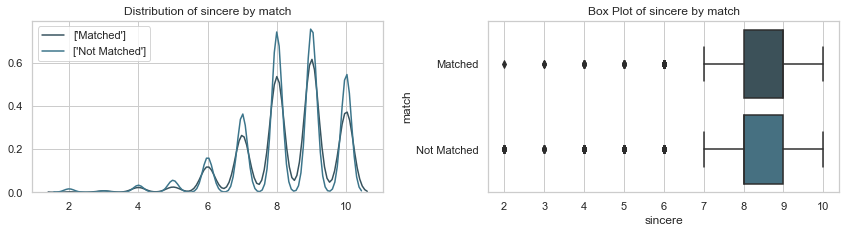

In [31]:
x = 'sincere'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Subject's Self Rating on Sincerity" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Subject's Self Rating on Intelligence

Match by Subject's Self Rating on Intelligence


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
intelligence,Matched,888.0,18,2.0,7.0,7.908784,8.0,9.0,10.0,-6.881395,45.353604
intelligence,Not Matched,4404.0,51,2.0,7.0,7.694596,8.0,9.0,10.0,-9.185016,82.364522


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,intelligence,match,33.902409,12385.842867,1.0,5290.0,14.479737,0.000143,0.00273


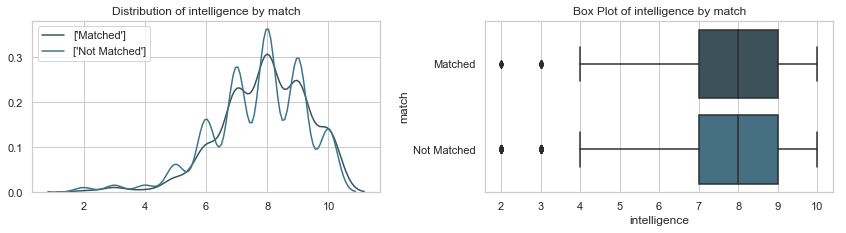

In [32]:
x = 'intelligence'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Subject's Self Rating on Intelligence" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Subject's Self Rating on Sense of Humor

Match by Subject's Self Rating on Sense of Humor


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
funny,Matched,888.0,18,3.0,8.0,8.423423,8.0,9.0,10.0,-6.881395,45.353604
funny,Not Matched,4404.0,51,3.0,8.0,8.389873,8.0,9.0,10.0,-9.185016,82.364522


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,funny,match,0.831841,6032.381122,1.0,5290.0,0.72947,0.393094,0.000138


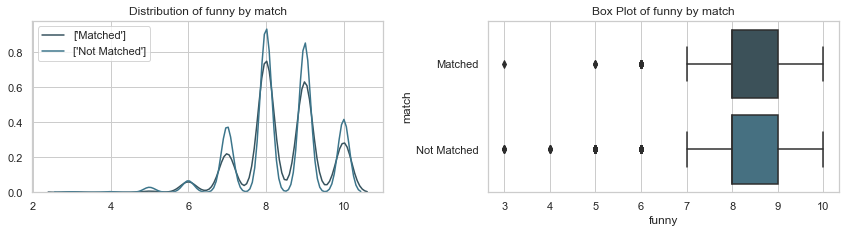

In [33]:
x = 'funny'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Subject's Self Rating on Sense of Humor" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Subject's Self Rating on Ambition

Match by Subject's Self Rating on Ambition


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
ambitious,Matched,888.0,18,2.0,7.0,7.646396,8.0,9.0,10.0,-6.881395,45.353604
ambitious,Not Matched,4404.0,51,2.0,7.0,7.557448,8.0,9.0,10.0,-9.185016,82.364522


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,ambitious,match,5.846809,16789.434181,1.0,5290.0,1.842207,0.17475,0.000348


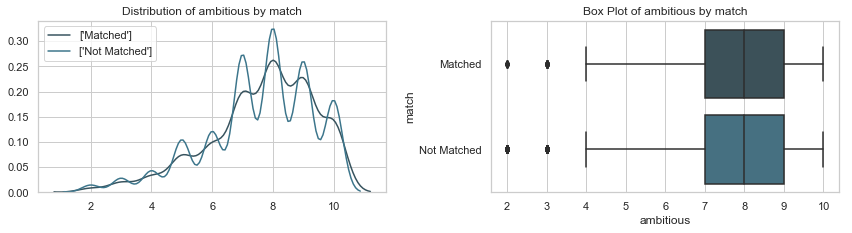

In [34]:
x = 'ambitious'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Subject's Self Rating on Ambition" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Subject's Rating of Partner on Attractiveness

Match by Subject's Rating of Partner on Attractiveness


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
attractive_partner,Matched,904.0,2,1.0,6.0,7.334624,7.0,8.0,10.0,-21.213256,448.002212
attractive_partner,Not Matched,4320.0,135,0.0,5.0,5.954259,6.0,7.0,10.0,-5.480078,28.031250


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,attractive_partner,match,1424.415389,18342.947902,1.0,5222.0,405.512636,6.439135e-87,0.072059


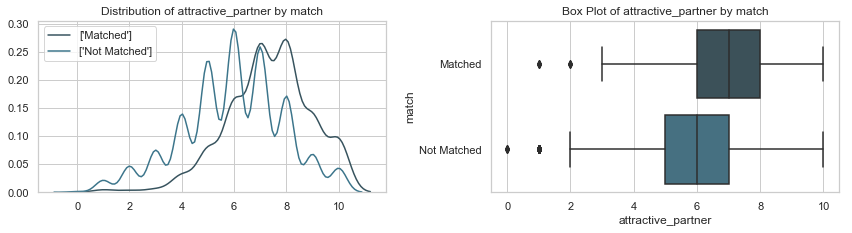

In [35]:
x = 'attractive_partner'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Subject's Rating of Partner on Attractiveness" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Subject's Rating of Partner on Sincerity

Match by Subject's Rating of Partner on Sincerity


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
sincere_partner,Matched,898.0,8,0.0,7.0,7.782851,8.0,9.0,10.0,-10.500424,108.258909
sincere_partner,Not Matched,4282.0,173,0.0,6.0,7.059201,7.0,8.0,10.0,-4.774081,20.791847


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,sincere_partner,match,388.731504,14988.39837,1.0,5178.0,134.293984,1.123192e-30,0.02528


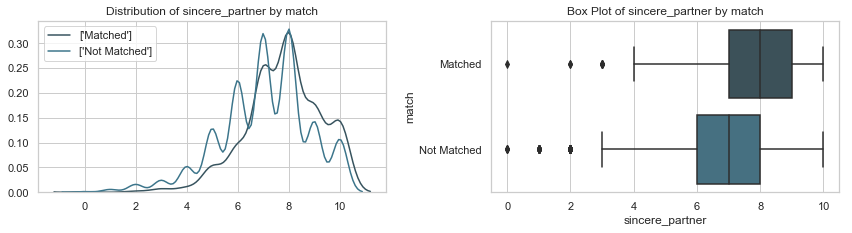

In [36]:
x = 'sincere_partner'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Subject's Rating of Partner on Sincerity" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Subject's Rating of Partner on Intelligence

Match by Subject's Rating of Partner on Intelligence


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
intelligence_partner,Matched,898.0,8,3.0,7.0,7.933185,8.0,9.0,10.0,-10.500424,108.258909
intelligence_partner,Not Matched,4270.0,185,0.0,6.0,7.248829,7.0,8.0,10.0,-4.596130,19.124407


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,intelligence_partner,match,347.492656,11609.360237,1.0,5166.0,154.629284,5.324806e-35,0.029062


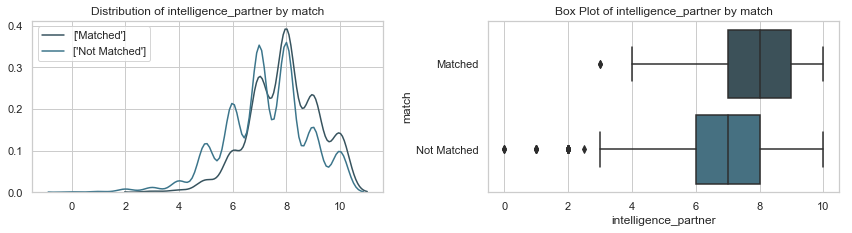

In [37]:
x = 'intelligence_partner'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Subject's Rating of Partner on Intelligence" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Subject's Rating of Partner on Sense of Humor

Match by Subject's Rating of Partner on Sense of Humor


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
funny_partner,Matched,893.0,13,2.0,7.0,7.665733,8.0,9.0,10.0,-8.167427,64.706865
funny_partner,Not Matched,4235.0,220,0.0,5.0,6.139669,6.0,7.0,10.0,-4.159561,15.301948


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,funny_partner,match,1717.522308,17729.106982,1.0,5126.0,496.585607,4.461933e-105,0.08832


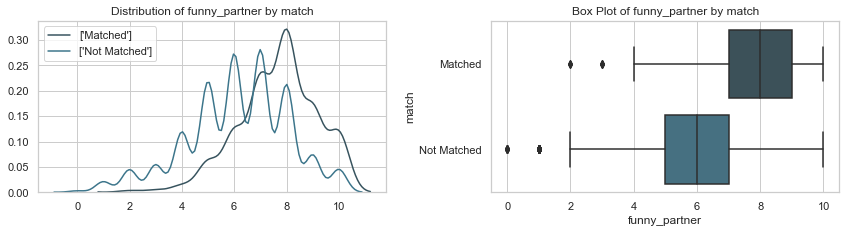

In [38]:
x = 'funny_partner'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Subject's Rating of Partner on Sense of Humor" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Subject's Rating of Partner on Ambition

Match by Subject's Rating of Partner on Ambition


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
ambitious_partner,Matched,853.0,53,0.0,6.0,7.348769,7.0,8.0,10.0,-3.762509,12.156473
ambitious_partner,Not Matched,4045.0,410,0.0,5.0,6.674042,7.0,8.0,10.0,-2.822625,5.967213


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,ambitious_partner,match,320.704449,15189.46562,1.0,4896.0,103.372233,4.806624e-24,0.020677


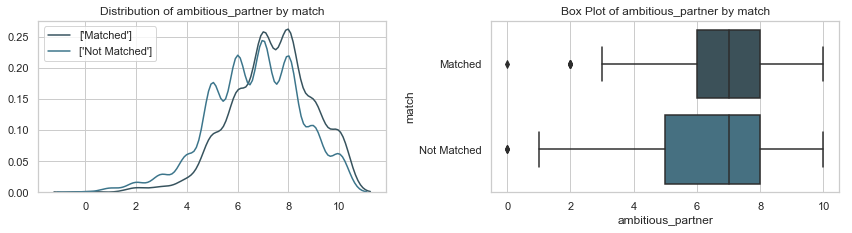

In [39]:
x = 'ambitious_partner'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Subject's Rating of Partner on Ambition" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Subject's Rating of Partner on Shared Interests

Match by Subject's Rating of Partner on Shared Interests


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
shared_interests_partner,Matched,821.0,85,0.0,6.0,6.742387,7.0,8.0,10.0,-2.786100,5.762356
shared_interests_partner,Not Matched,3849.0,606,0.0,4.0,5.204988,5.0,7.0,10.0,-2.123424,2.508929


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,shared_interests_partner,match,1599.36427,19973.529145,1.0,4668.0,373.786343,3.552211e-80,0.074138


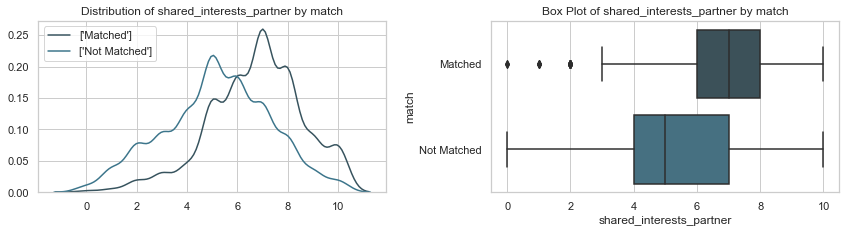

In [40]:
x = 'shared_interests_partner'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Subject's Rating of Partner on Shared Interests" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Correlation of Interests

Match by Correlation of Interests


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
interests_correlate,Matched,888.0,18,-0.83,-0.01,0.209324,0.25,0.46,0.79,-6.881395,45.353604
interests_correlate,Not Matched,4368.0,87,-0.73,-0.02,0.194558,0.21,0.43,0.91,-6.944553,46.226814


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,interests_correlate,match,0.160907,487.196742,1.0,5254.0,1.735249,0.187799,0.00033


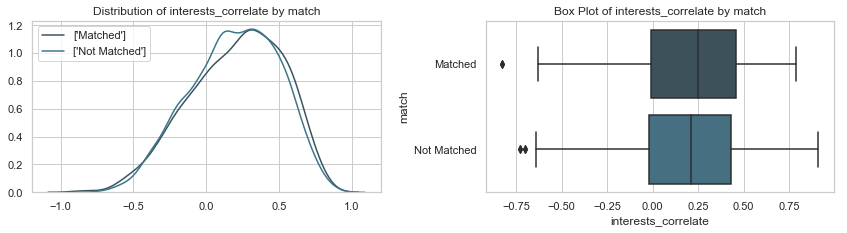

In [41]:
x = 'interests_correlate'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Correlation of Interests" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Wave Size

Match by Wave Size


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
wave_size,Matched,906.0,0,50.0,392.0,578.856512,648.0,800.0,968.0,0.0,-3.0
wave_size,Not Matched,4455.0,0,50.0,450.0,608.576880,648.0,800.0,968.0,0.0,-3.0


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,wave_size,match,665025.743278,3.718683e+08,1.0,5359.0,9.583697,0.001973,0.001785


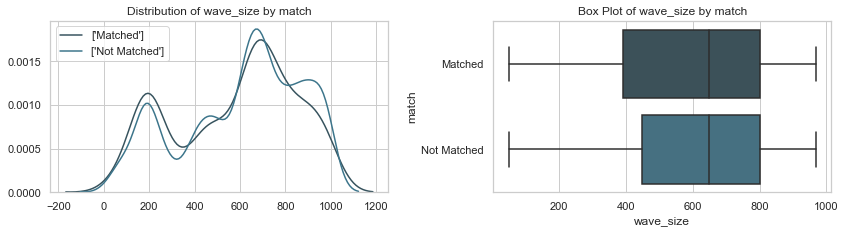

In [42]:
x = 'wave_size'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Wave Size" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Relative Attractiveness (Subject's Perspective)

Match by Relative Attractiveness (Subject's Perspective)


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
rel_attractive,Matched,886.0,20,-0.888889,-0.142857,0.054268,0.000000,0.166667,1.5,-6.505580,40.322573
rel_attractive,Not Matched,4276.0,179,-1.000000,-0.333333,-0.106162,-0.142857,0.000000,3.5,-4.682962,19.930130


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,rel_attractive,match,18.889768,803.160892,1.0,5160.0,121.359496,6.511325e-28,0.022979


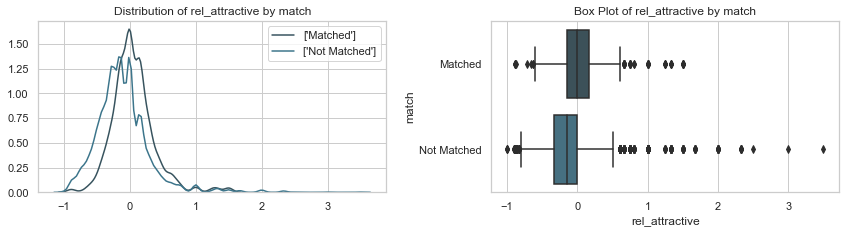

In [43]:
x = 'rel_attractive'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Relative Attractiveness (Subject's Perspective)" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Relative Sincerity (Subject's Perspective)

Match by Relative Sincerity (Subject's Perspective)


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
rel_sincere,Matched,880.0,26,-1.0,-0.200000,-0.039156,-0.100,0.111111,2.0,-5.645857,29.875699
rel_sincere,Not Matched,4238.0,217,-1.0,-0.285714,-0.112293,-0.125,0.000000,3.5,-4.192989,15.581157


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,rel_sincere,match,3.897846,557.735475,1.0,5116.0,35.754193,2.390317e-09,0.00694


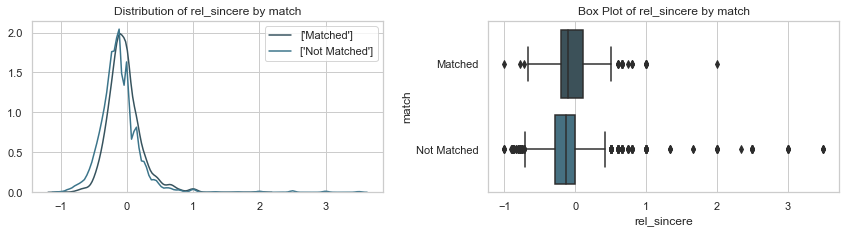

In [44]:
x = 'rel_sincere'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Relative Sincerity (Subject's Perspective)" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Relative Intelligence (Subject's Perspective)

Match by Relative Intelligence (Subject's Perspective)


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
rel_intelligence,Matched,880.0,26,-0.666667,-0.125000,0.043299,0.0,0.142857,3.0,-5.645857,29.875699
rel_intelligence,Not Matched,4226.0,229,-1.000000,-0.222222,-0.005216,0.0,0.142857,4.0,-4.063045,14.508337


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,rel_intelligence,match,1.714293,723.066888,1.0,5104.0,12.100888,0.000508,0.002365


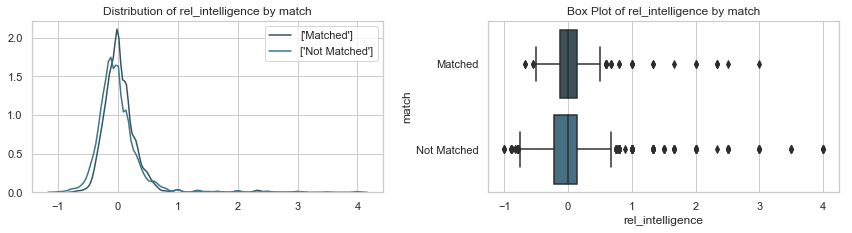

In [45]:
x = 'rel_intelligence'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Relative Intelligence (Subject's Perspective)" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Relative Sense of Humor (Subject's Perspective)

Match by Relative Sense of Humor (Subject's Perspective)


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
rel_funny,Matched,875.0,31,-0.777778,-0.222222,-0.077084,-0.111111,0.000000,1.000000,-5.124572,24.261235
rel_funny,Not Matched,4191.0,264,-1.000000,-0.400000,-0.255827,-0.250000,-0.111111,1.333333,-3.733362,11.937992


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,rel_funny,match,23.127058,311.380501,1.0,5064.0,376.116744,7.025812e-81,0.069138


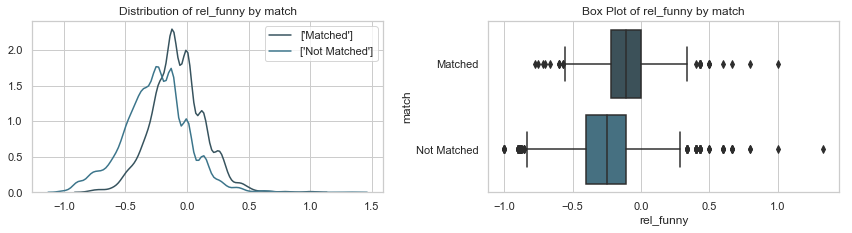

In [46]:
x = 'rel_funny'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Relative Sense of Humor (Subject's Perspective)" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Relative Ambition (Subject's Perspective)

Match by Relative Ambition (Subject's Perspective)


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
rel_ambitious,Matched,835.0,71,-1.0,-0.2,0.024958,0.000000,0.142857,4.0,-3.137769,7.845593
rel_ambitious,Not Matched,4002.0,453,-1.0,-0.3,-0.044269,-0.111111,0.111111,4.0,-2.635836,4.947630


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,rel_ambitious,match,3.310827,966.306941,1.0,4835.0,16.566008,0.000048,0.003415


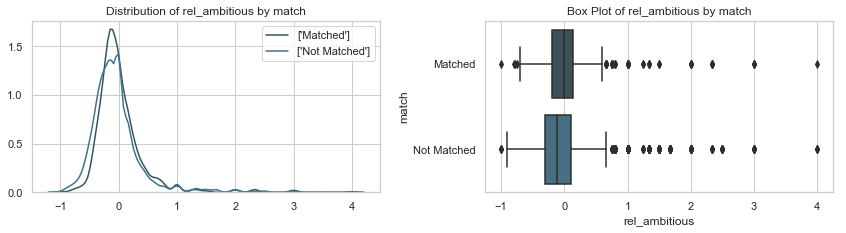

In [47]:
x = 'rel_ambitious'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Relative Ambition (Subject's Perspective)" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Relative Attractiveness (Partner's Perspective)

Match by Relative Attractiveness (Partner's Perspective)


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
rel_attractive_o,Matched,886.0,20,-0.857143,-0.142857,0.047176,0.000000,0.166667,2.333333,-6.505580,40.322573
rel_attractive_o,Not Matched,4263.0,192,-1.000000,-0.333333,-0.124182,-0.142857,0.000000,2.500000,-4.499796,18.248164


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,rel_attractive_o,match,21.539458,587.255822,1.0,5147.0,188.782442,3.234423e-42,0.03538


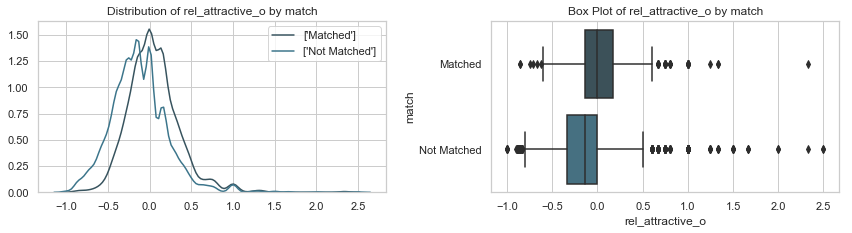

In [48]:
x = 'rel_attractive_o'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Relative Attractiveness (Partner's Perspective)" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Relative Sincerity (Partner's Perspective)

Match by Relative Sincerity (Partner's Perspective)


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
rel_sincere_o,Matched,882.0,24,-1.0,-0.2,-0.028060,-0.100,0.111111,4.0,-5.897221,32.777211
rel_sincere_o,Not Matched,4222.0,233,-1.0,-0.3,-0.108854,-0.125,0.000000,4.0,-4.021860,14.175359


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,rel_sincere_o,match,4.762465,668.760598,1.0,5102.0,36.333025,1.780047e-09,0.007071


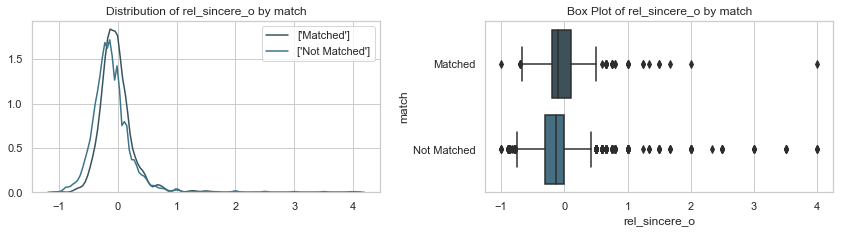

In [49]:
x = 'rel_sincere_o'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Relative Sincerity (Partner's Perspective)" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Relative Intelligence (Partner's Perspective)

Match by Relative Intelligence (Partner's Perspective)


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
rel_intelligence_o,Matched,881.0,25,-0.625,-0.125000,0.058275,0.0,0.142857,4.0,-5.767875,31.268377
rel_intelligence_o,Not Matched,4208.0,247,-1.000,-0.222222,0.000873,-0.1,0.142857,4.0,-3.885246,13.095135


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,rel_intelligence_o,match,2.400357,834.048114,1.0,5087.0,14.640183,0.000132,0.00287


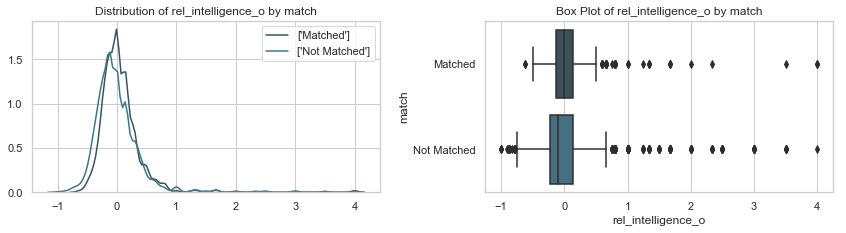

In [50]:
x = 'rel_intelligence_o'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Relative Intelligence (Partner's Perspective)" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Relative Sense of Humor (Partner's Perspective)

Match by Relative Sense of Humor (Partner's Perspective)


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
rel_funny_o,Matched,877.0,29,-0.875,-0.222222,-0.075152,-0.111111,0.000000,1.666667,-5.317372,26.274447
rel_funny_o,Not Matched,4179.0,276,-1.000,-0.428571,-0.251706,-0.250000,-0.111111,2.333333,-3.634192,11.207349


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,rel_funny_o,match,22.595342,353.585856,1.0,5054.0,322.96783,4.759873e-70,0.060065


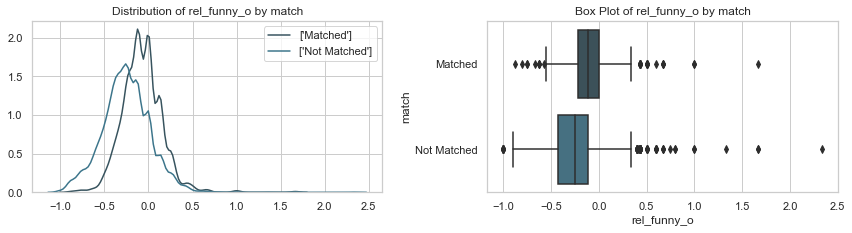

In [51]:
x = 'rel_funny_o'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Relative Sense of Humor (Partner's Perspective)" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i

### Match by Relative Ambition (Partner's Perspective)

Match by Relative Ambition (Partner's Perspective)


,level,count,missing,min,25%,mean,50%,75%,max,skew,kurtosis
rel_ambitious_o,Matched,841.0,65,-1.0,-0.222222,0.033077,0.000,0.142857,3.0,-3.318998,9.015750
rel_ambitious_o,Not Matched,3999.0,456,-1.0,-0.300000,-0.043662,-0.125,0.125000,4.0,-2.623693,4.883765


Anova


,Dependent,Independent,Sum Sq Model,Sum Sq Residuals,df Model,df Residuals,F,PR(>F),Eta Squared
0,rel_ambitious_o,match,4.09199,1048.817731,1.0,4838.0,18.875586,0.000014,0.003886


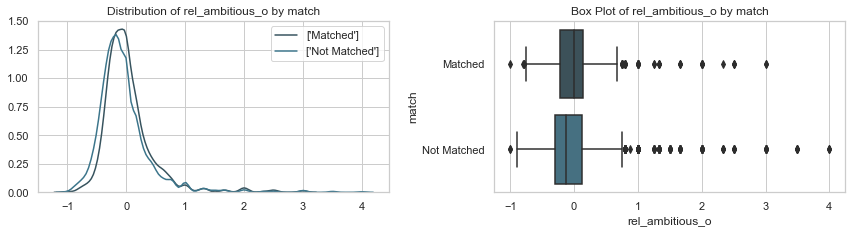

In [52]:
x = 'rel_ambitious_o'
y = 'match'
i,d,p = bivariate.analysis(df, x, y);
print(color.BOLD + "Match by Relative Ambition (Partner's Perspective)" + color.END)
d
print(color.BOLD + "Anova" + color.END)
i